<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write nueral networks for classification problems

A few types of classification problems :  

  * Binary Classification
  * Multiclass classification
  * Multilabel classification
  



**Creating a data to view and fit**

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now...let's visualize it


In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0" :X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


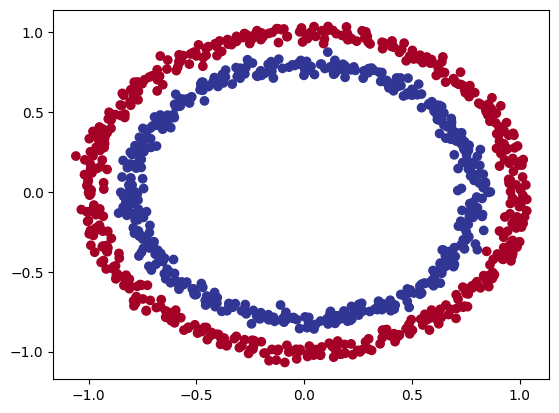

In [ ]:
#visualize this with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

**Learning Tip :**

Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.](https://playground.tensorflow.org/)org building and running different neural networks. See what happens when you change different hyperparameters.


In [ ]:
#Input and Output shapes of our neural networks

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#Check how many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf

tf.__version__

'2.14.0'

**STEPS IN MODELING WITH TENSORFLOW:**

* Now we are working with binary classification here in this case
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate





In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 1.4668 - accuracy: 0.5030
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7297 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4900


In [ ]:
#Let's try and improve our model for longer and see

model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing

so let's step things up a notch and add extra layer

In [ ]:
# Set random seee
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less



In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4340


[0.6934070587158203, 0.4339999854564667]

**Improving the model**

Let's look in to our bag of trics to improve our model

1. Create Model  - Add more layers and increase or decrease and increase the hidden units
2. Compile a model - Can change the SGD() to Adam
3. Fitting a model - Train for more time, increase the number of epochs




In [ ]:
#Setting the random seed
tf.random.set_seed(42)

#1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the Model
model_3.fit(X,y, epochs = 100, verbose = 0)

In [ ]:
#4. Evaluate the model
model_3.evaluate(X,y)     # still 50% accuracy we are getting the output


32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5200


[0.6932013034820557, 0.5199999809265137]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[0.5040549 ],
       [0.49920607],
       [0.49888846],
       [0.4974966 ],
       [0.5091868 ],
       [0.49728703],
       [0.49821615],
       [0.504577  ],
       [0.50647926],
       [0.49663588],
       [0.5034497 ],
       [0.50002617],
       [0.49769756],
       [0.50709885],
       [0.5080352 ],
       [0.50757056],
       [0.5013135 ],
       [0.50744355],
       [0.50039256],
       [0.50456125],
       [0.5024039 ],
       [0.49602   ],
       [0.50811565],
       [0.5037457 ],
       [0.4969948 ],
       [0.49831912],
       [0.49829298],
       [0.5064293 ],
       [0.5078333 ],
       [0.5075603 ],
       [0.5065808 ],
       [0.49643478],
       [0.49840218],
       [0.50613946],
       [0.5082713 ],
       [0.49614754],
       [0.49756098],
       [0.50032246],
       [0.5077211 ],
       [0.50176305],
       [0.5048764 ],
       [0.49879012],
       [0.50394416],
       [0.5069395 ],
       [0.502987  ],
       [0.50144273],
       [0.5083856 ],
       [0.499

To visualize our model predictions, let's create a function 'plot_decision_boundary()', this function will

* Take in the trained model, features(X), and abels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(Where each unique class falls)



In [ ]:
import numpy as np

In [ ]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


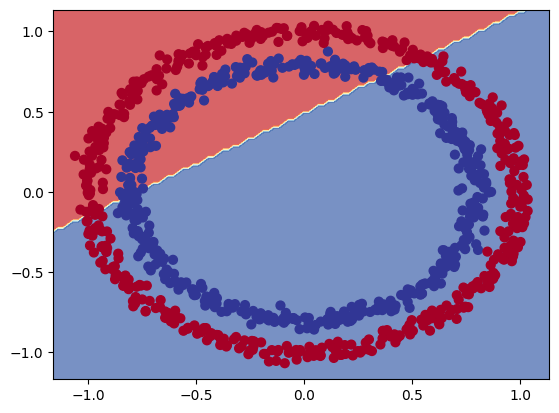

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

# Let's see if our model can be used for regression model

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#  split the data into training and test sets
X_reg_train = X_regression[ :150]
X_reg_test = X_regression[150: ]

y_reg_train = y_regression[ :150]
y_reg_test = y_regression[150 : ]

# fit the model to the regression model data
model_3.fit(X_reg_train, y_reg_train, epochs =100)








ValueError                                Traceback (most recent call last)
<ipython-input-40-f63aa7e296d7> in <cell line: 17>()
     15
     16 #fit the model to the regression model data
---> 17 model_3.fit(X_reg_train, y_reg_train, epochs =100)

1 frames
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py in tf__train_function(iterator)
     13                 try:
     14                     do_return = True
---> 15                     retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
     16                 except:
     17                     do_return = False

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=int32)
      • training=True
      • mask=None

In [ ]:
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#split the data into training and test sets
X_reg_train = X_regression[ :150]
X_reg_test = X_regression[150: ]

y_reg_train = y_regression[ :150]
y_reg_test = y_regression[150 : ]

#fit the model to the regression model data
#model_3.fit(X_reg_train, y_reg_train, epochs =100)

Ohhh...wait now we compiled our model for binary classification problem but now we are working on regression problem, let's change the model to suit our model.


In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 423.0357 - mae: 423.0357
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 288.7163 - mae: 288.7163
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 160.7333 - mae: 160.7333
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 52.9881 - mae: 52.9881
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 84.4481 - mae: 84.4481
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 84.9930 - mae: 84.9930
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 50.6062 - mae: 50.6062
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 54.3907 - mae: 54.3907
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.6073 - mae: 49.6073
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9974 - mae: 45.9974
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


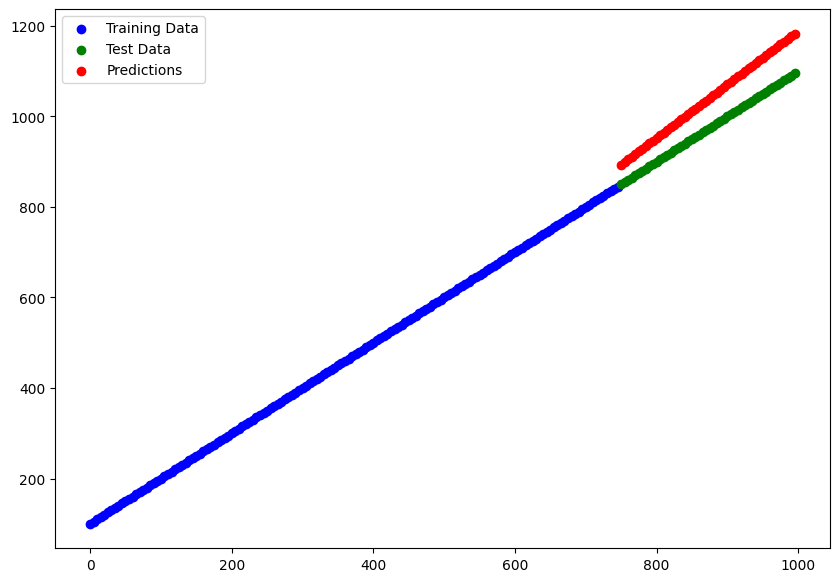

In [ ]:
# Make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figsize =(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend();

## The missing peace : Non - **Leniearity**

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy']) # can also write it as loss = tf.keras.losses.BinaryCrossentropy

#3. Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2426 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1000 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9636 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8473 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6878 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5540 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2783 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0303 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.5371 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2325 - accuracy: 0.5000
Epoch 11/

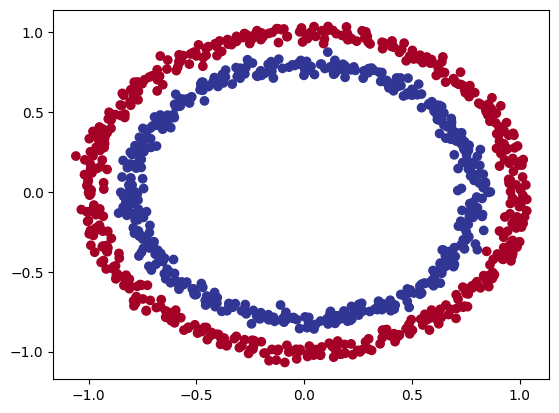

In [ ]:
# Check out our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap =plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


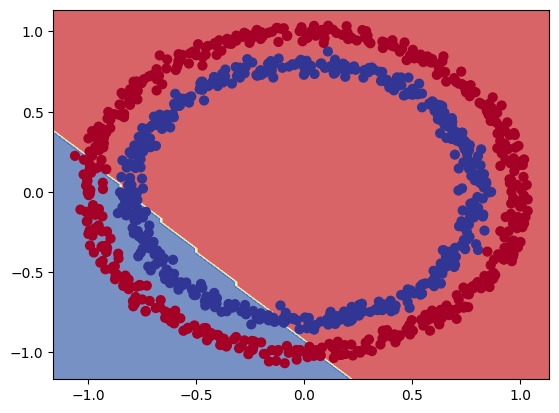

In [ ]:
#Check the decision boundary

plot_decision_boundary(model_4, X=X, y=y)

**Let's try to build our first neural network with non linear activation function**

In [ ]:
#Set random seed

tf.random.set_seed(42)

#1. Create a model with non linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu )
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])
#Fit the model

hostory = model_5.fit(X,y, epochs =100)



Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.8797 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6727 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5330 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5081 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5044 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4840 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4660 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4543 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4403 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4364 - accuracy: 0.4710
Epoch 11/

In [ ]:
#Time to replicate the multilayer neural network from the TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_6.fit(X, y, epochs =250)


Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 3.5739 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 2.2627 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.2178 - accuracy: 0.4900
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 1.0777 - accuracy: 0.4640
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9902 - accuracy: 0.4650
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9329 - accuracy: 0.4660
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8930 - accuracy: 0.4760
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.4820
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8351 - accuracy: 0.4840
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8088 - accuracy: 0.4820
Epoch 11/

In [ ]:
#Evaluate the model

model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9790


[0.06741838902235031, 0.9789999723434448]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


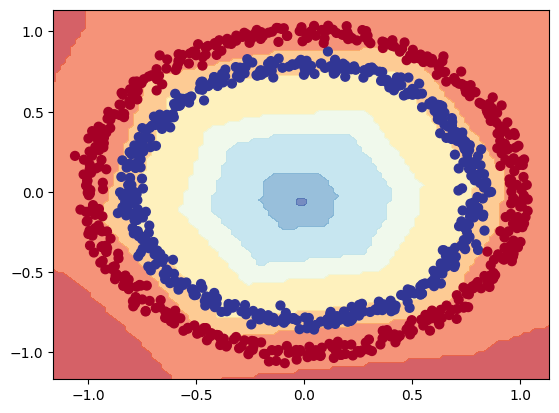

In [ ]:
#Visualize the model prediction to have better idea

plot_decision_boundary(model_6,X,y)

In [ ]:
#Let's create another model

#Set the ranodm seed
tf.random.set_seed(42)

#1. Create the Model with multiple layers and multiple activation functions and multiple activation functions
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
#2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_7.fit(X, y, epochs = 150)



Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.4990
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.5010
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5010
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4990
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4990
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4920
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4950
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4910
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4920
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.4950
Epoch 11/

In [ ]:
#4. Evaluate the model

model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9950


[0.0984760969877243, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


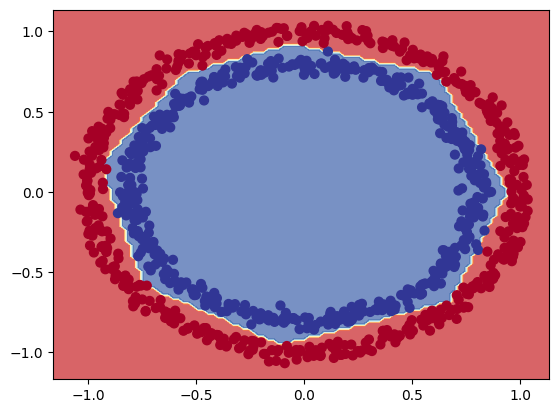

In [ ]:
#Let's visualize classification

plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (Similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

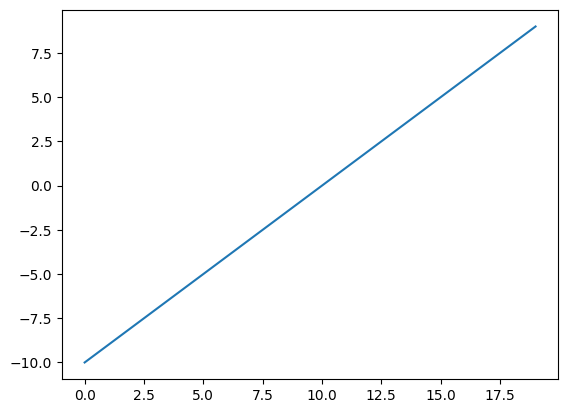

In [ ]:
#Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))

def sigmoid(x) :
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

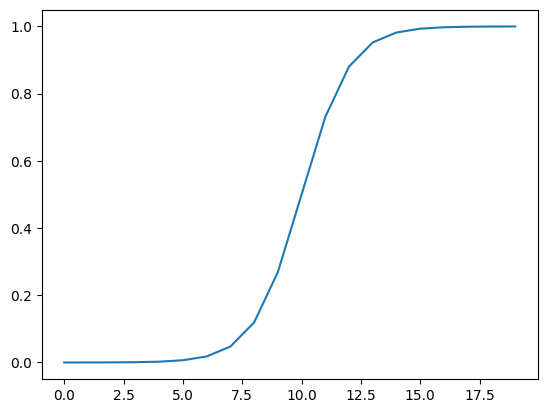

In [ ]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
#Let's recreate the Relu Function

def relu(x):
  return tf.maximum(0,x)

#Let's pass our toy tensor to the relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

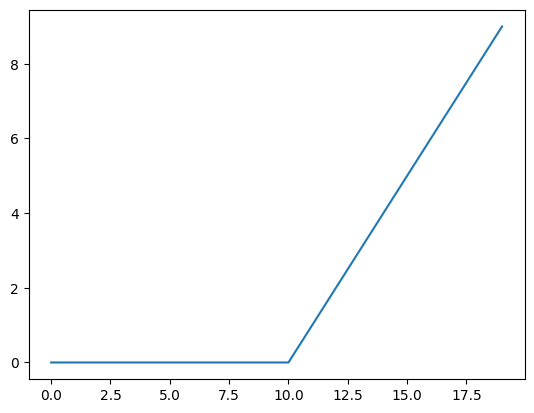

In [ ]:
#Let's visualize the relu with tensor

plt.plot(relu(A))

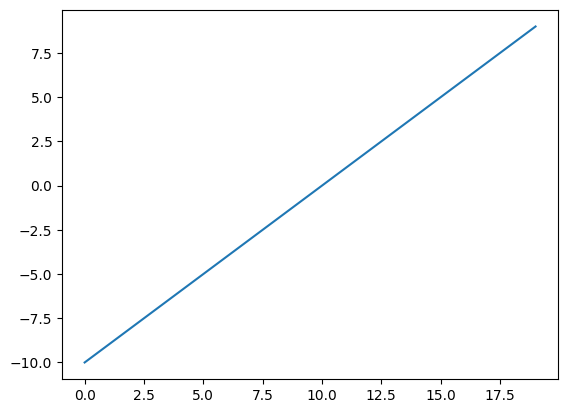

In [ ]:
plt.plot(A)

In [ ]:
#Let's try the linear activation function
# It returns the unmodified value

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

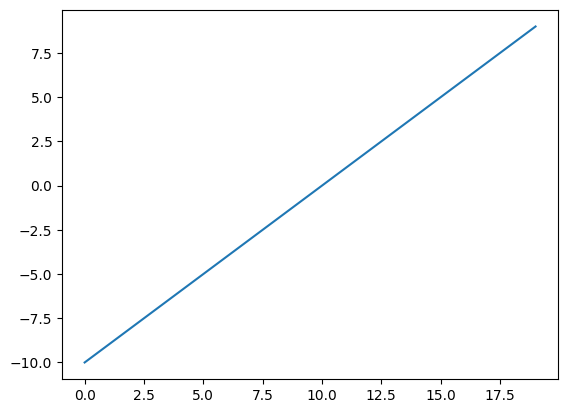

In [ ]:
#Let's draw the same for the completeness

plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A) # This did not change so it should return the true

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**Evaluating and Improving our classification model**

So far we have been training and testing on the same dataset...

Howeer, in machine learning this is a sin

So let's create a training and test set


In [ ]:
len(X)

1000

In [ ]:
#Split the data into train and test sets

X_train, y_train = X[ :800], y[ :800]
X_test, y_test = X[ 800:], y[800: ]

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Let's recreate the model to fit on the training data and evaluate on the testset

#Set the random seed
tf.random.set_seed(42)

#1.Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model

model_8.compile(loss = "binary_crossentropy", #tf.keras.losses.binary_crossentropy
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])


#3.Fit the model
history = model_8.fit(X_train, y_train, epochs = 200)


Epoch 1/200
25/25 [==============================] - 1s 4ms/step - loss: 0.6915 - accuracy: 0.5175
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5250
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5250
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5250
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5250
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5225
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5350
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5300
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5412
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5400
Epoch 11/

In [ ]:
# 4. Evaluate he model on test dataset

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9950


[0.1525028944015503, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


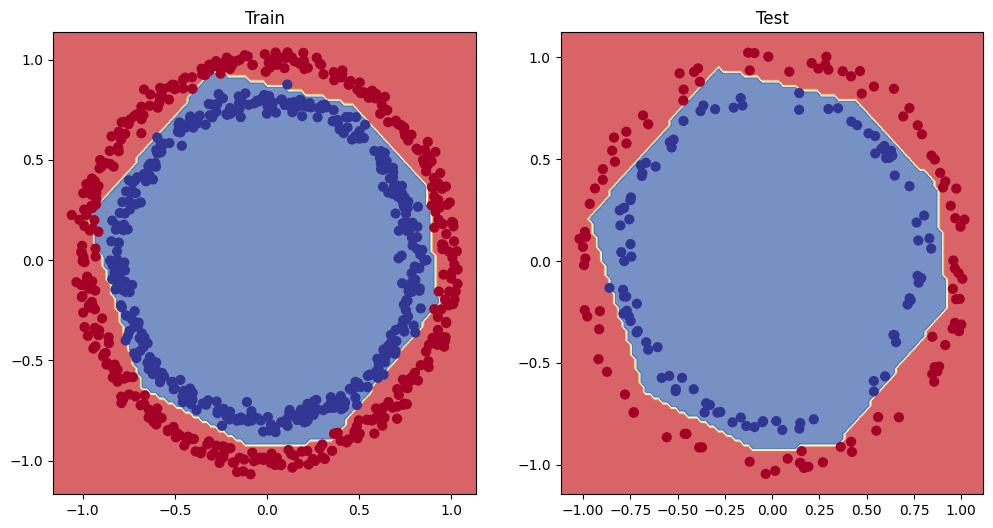

In [ ]:
#Plot the decision boundary for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show()

In [ ]:
# Plot the loss (or training) curves


In [ ]:
history.history # tracks the accuracy and loss

{'loss': [0.6914942860603333,
  0.690869152545929,
  0.6902889013290405,
  0.6898258924484253,
  0.6893252730369568,
  0.688947319984436,
  0.6883456707000732,
  0.6879470944404602,
  0.6875059008598328,
  0.6870127320289612,
  0.6865797638893127,
  0.6862413883209229,
  0.6855931878089905,
  0.6850813031196594,
  0.6845839619636536,
  0.6839280724525452,
  0.6833990216255188,
  0.6825768351554871,
  0.6821089386940002,
  0.6813931465148926,
  0.6807363629341125,
  0.6799934506416321,
  0.6793316602706909,
  0.6786356568336487,
  0.677906334400177,
  0.6771637797355652,
  0.6762596368789673,
  0.6749184131622314,
  0.674012303352356,
  0.6728330850601196,
  0.6718319058418274,
  0.6707518696784973,
  0.6695133447647095,
  0.6684215068817139,
  0.6674997806549072,
  0.6658712029457092,
  0.6645413041114807,
  0.6632556915283203,
  0.6614565849304199,
  0.660021185874939,
  0.6587626934051514,
  0.6566676497459412,
  0.655195415019989,
  0.6534390449523926,
  0.6516388058662415,
  0.6498

In [ ]:
#Make it a DataFrame
pd.DataFrame(history.history)


,loss,accuracy
0,0.691494,0.51750
1,0.690869,0.52500
2,0.690289,0.52500
3,0.689826,0.52500
4,0.689325,0.52500
...,...,...
195,0.163758,0.98750
196,0.162621,0.98625
197,0.161074,0.98750
198,0.159671,0.98750


Text(0.5, 1.0, 'Model_8 loss curves')

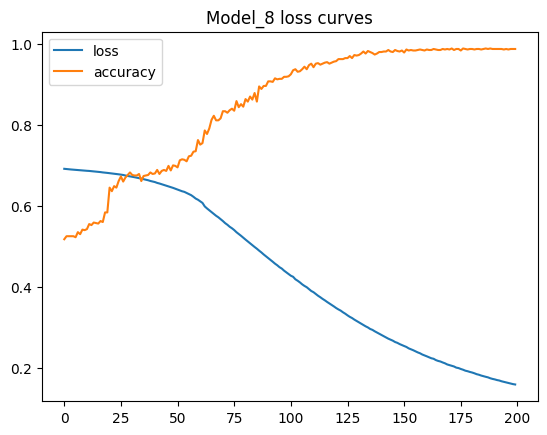

In [ ]:
# Plot the loss cureves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note** : For many functions, if the loss function is going down it means it is getting improving(The prediction it's making are ground truth tables)


**Finding the best learning rate :**

To find the ideal learning rate (The learning rate where the loss decreases the most during the training) we're going to use the following steps :

* A Learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your **while it's training**
* Another model (We could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model

model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics  = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#4. Fit the model (Pass lr scheduler call back)

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs =100,
                        callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5188 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5225 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

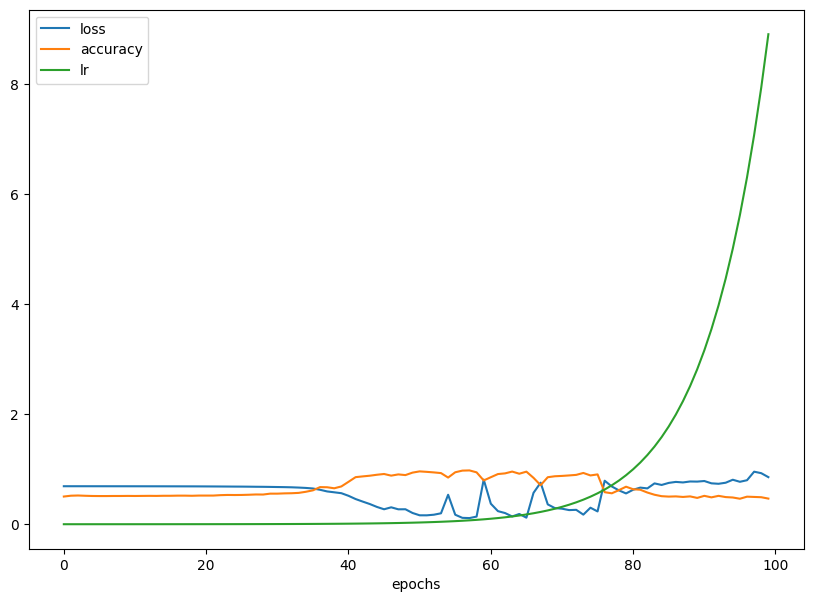

In [ ]:
#check out the history

pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

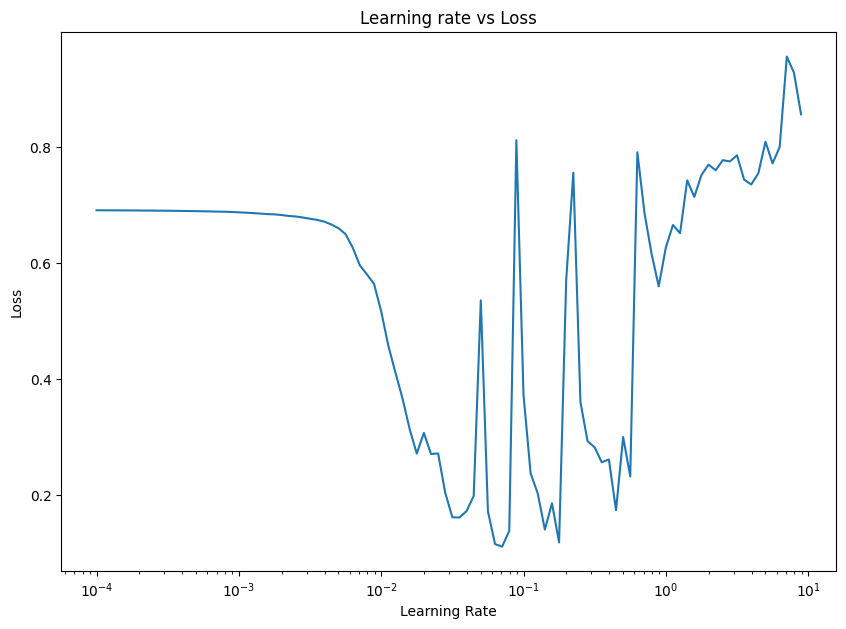

In [ ]:
#Plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [ ]:
len(lrs)

100

In [ ]:
#Example of other typical learning rates values :

10**0, 10**-1, 10**-2, 10**-3, 1e-4, 1e-5, 10**-5

(1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-05)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4737
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5113
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5150
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5387
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5625
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.5525
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.5700
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.5775
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.5775
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6476 - accuracy: 0.5750
Epoch 11/20
25/25 [

In [ ]:
#Evaluate the model 10 on test dataset

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2926 - accuracy: 0.9650


[0.2926388680934906, 0.9649999737739563]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


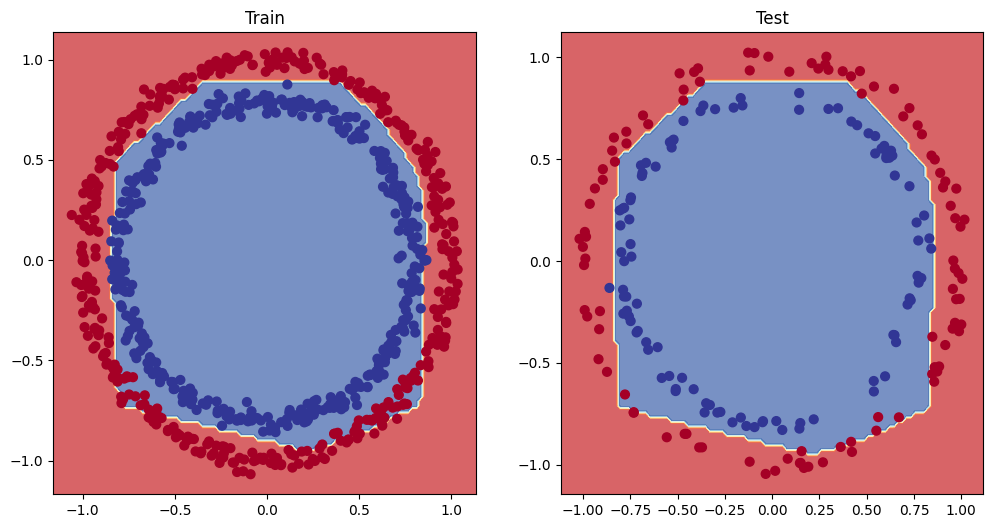

In [ ]:
#Plot the decision boundaries for the  training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y= y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y= y_test)
plt.show()


## More Classification and evaluation methods

Alongside visualizing our models as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
  * Accuracy : Default metric for the classification problems. Not best for imbalanced classes.
  * Precision : Higher precision leads to less false positives
  * Recall : Higher recall leads to less false negatives
  * F1-score : Combination of precision and recall, usually good overall metric for the classification model
  * Confusion matrix : When comparing predictions to the truth labels to see where model get's confused. Can be hard to use with large number of classes.
  * Classification report (from scikit learn ) -  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



In [ ]:
# Check the accuracy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy of the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.9650
Model loss on the test set : 0.2926388680934906
Model accuracy of the test set : 96.50%


**How about a confusion matrix ?**

y_preds : looks like these y_preds our predictions array has come out in **predictions probability** form.. the standard output from the sigmoid (or softmax)

so now let's convert the prediction probabilities to binary format and view the first 10
* tf.round(y_preds)[:10]

In [ ]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

#Make  predictions
y_preds = tf.round(model_10.predict(X_test))

#Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


array([[95,  6],
       [ 1, 98]])

# How about we prettify our confusion matrix ?

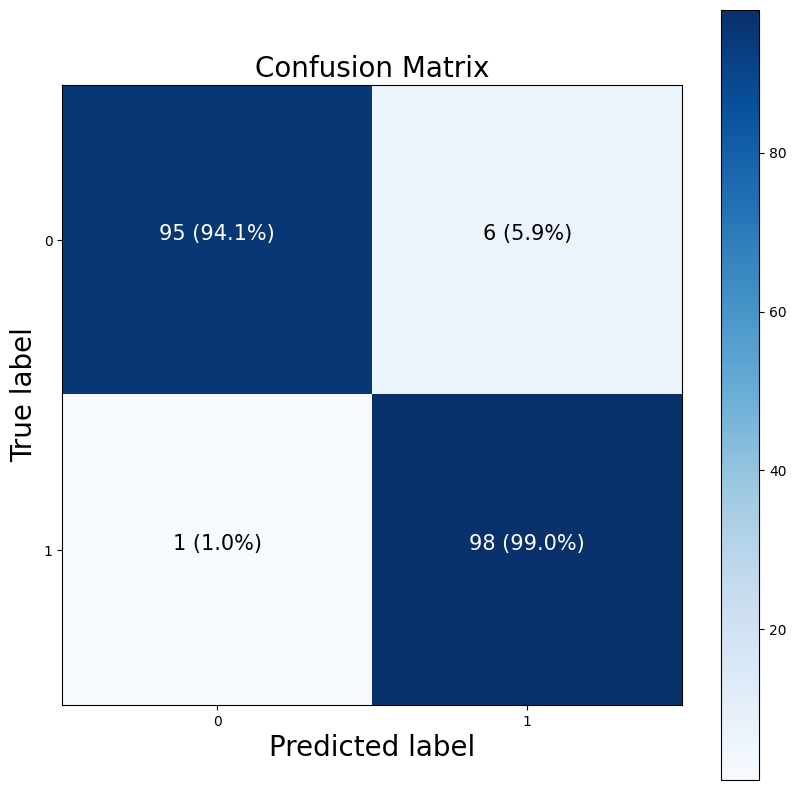

In [ ]:
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


**Working with a larger example (Multiclass classification)**


When you have more than 2 classes as an option to be choosen, it's known as **multi class classification**

* This means if you have 3 different classes, it's multi-class classification

* This means if you have 100 different classes, it's multi-class classification


To Practice the multiclass classification we are going to build a neural network to classify images of different items of clothing.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first training example
print(f"Training sample :\n {train_data[0]}\n")
print(f"Training label : \n {train_labels[0]}\n")

Training sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [ ]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

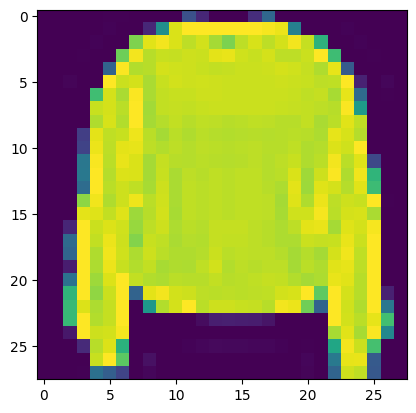

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
#Check out the sample labels
train_labels[7]

2

In [ ]:
#Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

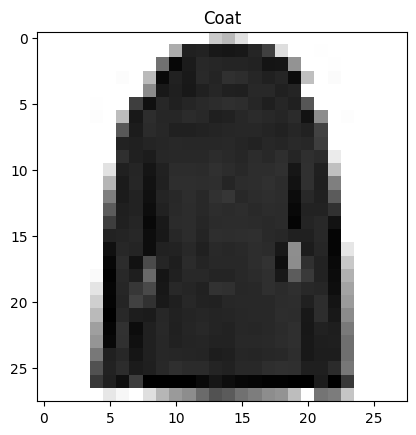

In [ ]:
#plot an example image and it's image
index_of_choice =2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


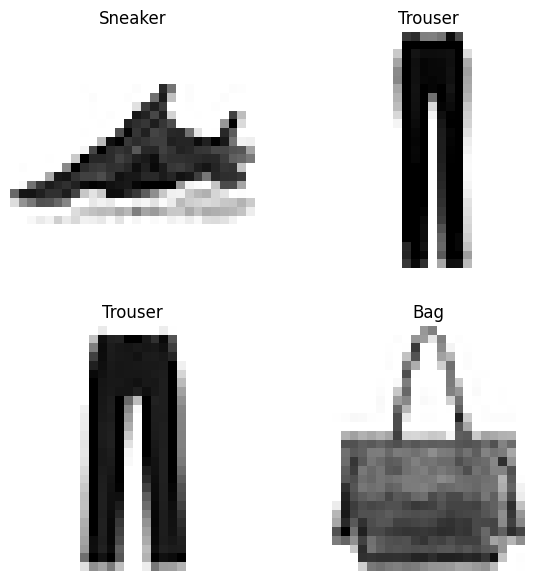

In [ ]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

**Building a multiclass classification model**

For our multiclass classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things :

* Input- shape = 28,28 as we checked earlier
* Output- shape = 10 (10 classes and 1 per class)
* Loss function = CategoricalCrossentropy()
* Output Layer Activation = softmax (not sigmoid)
* If your labels are one hot encoded then use **CategoricalCrossentropy()**, If your labels are integer form use **SparseCategoricalCrossentropy**

**Note : Need to flatten our data for sure to go ahead in the neural networks**


In [ ]:
#Set the seed
tf.random.set_seed(42)

#1. Create model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flattens the entire 28, 28 into one flatten vector
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3. Fit the model
non_norm_history= model_11.fit(train_data,
                      train_labels,
                      epochs = 10,
                      validation_data=(test_data, test_labels)) # we can add this one also during the fit and we are using it for the first time, it also evalutes the test data during the training



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1427 - accuracy: 0.2069 - val_loss: 1.9193 - val_accuracy: 0.2426
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8046 - accuracy: 0.2730 - val_loss: 1.7539 - val_accuracy: 0.2521
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6724 - accuracy: 0.3058 - val_loss: 1.5575 - val_accuracy: 0.3202
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5037 - accuracy: 0.3382 - val_loss: 1.4899 - val_accuracy: 0.3294
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4565 - accuracy: 0.3445 - val_loss: 1.4502 - val_accuracy: 0.3545
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4324 - accuracy: 0.3550 - val_loss: 1.4297 - val_accuracy: 0.3602
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3897 - accuracy: 0.3928 - val_loss: 1.3805 - val_accuracy:

In [ ]:

#Check the model sammary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Check the min and max value of the training data
train_data.min(), train_data.max()

(0, 255)

Neural betworks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1


In [ ]:
# We can get our training and testing data to the 0 or 1 by deviding with the max value in the tensor
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [ ]:
#Check the min and max of scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

**Now our data is normalized so let's build a model to find the patterns within this**

In [ ]:
# set the seed
tf.random.set_seed(42)

#1. Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")

])

#2. Compile the model

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#3. Fit the model
norm_hisroty = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8831 - accuracy: 0.2314 - val_loss: 1.6844 - val_accuracy: 0.2928
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5920 - accuracy: 0.3517 - val_loss: 1.5184 - val_accuracy: 0.4125
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4457 - accuracy: 0.4178 - val_loss: 1.4076 - val_accuracy: 0.4175
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3495 - accuracy: 0.4469 - val_loss: 1.3265 - val_accuracy: 0.4621
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2890 - accuracy: 0.4663 - val_loss: 1.2883 - val_accuracy: 0.4873
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2501 - accuracy: 0.4802 - val_loss: 1.2667 - val_accuracy: 0.4789
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2219 - accuracy: 0.4831 - val_loss: 1.2350 - val_accuracy:

:key**Note :** Neural Networks tend to prefer data in nemerical form as well as scaled/normalized (numbers between 0 & 1)


Now let's plot the each models history (their loss curves)

<Axes: title={'center': 'Nonrmalized Data'}>

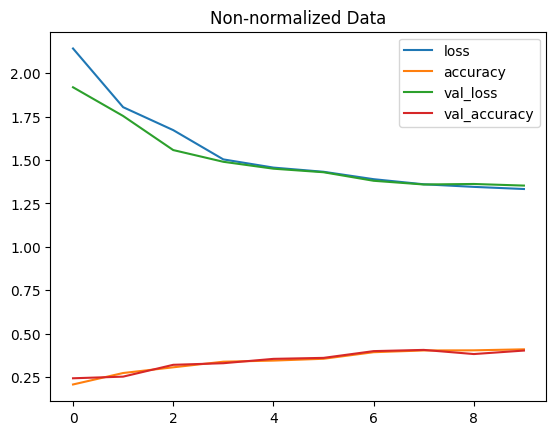

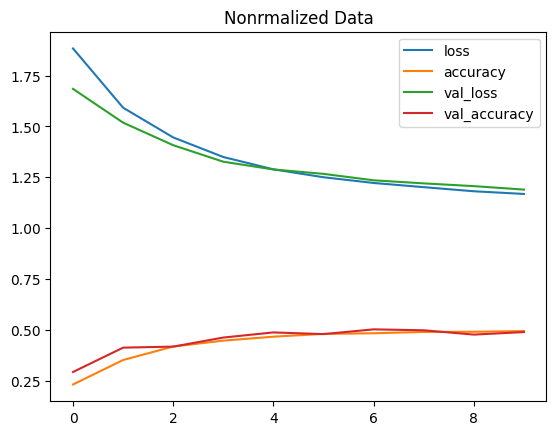

In [ ]:
import pandas as pd

#Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized Data")

#Plot non-normalized data loss curves
pd.DataFrame(norm_hisroty.history).plot(title = "Nonrmalized Data")




Note : The same model with even *slightly* different data can produce Dramatically different results.  So when you are comparing the models. it's important to make sure you're comparing them on the same criteria (Eg : same architechture but different data or the same data but different architecture)

In [ ]:
##Finding the ideal learning rate
tf.random.set_seed(42)

#1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#2. Compile the model
model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])

#3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3* 10**(epoch/20))

#Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs = 40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks = [lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4691 - accuracy: 0.1010 - val_loss: 2.3022 - val_accuracy: 0.1025 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2825 - accuracy: 0.1102 - val_loss: 2.3010 - val_accuracy: 0.1004 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2353 - accuracy: 0.1322 - val_loss: 2.3040 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0664 - accuracy: 0.1781 - val_loss: 2.3225 - val_accuracy: 0.0999 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6493 - accuracy: 0.3003 - val_loss: 2.5625 - val_accuracy: 0.1040 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5622 - accuracy: 0.3492 - val_loss: 2.7049 - val_accuracy: 0.1258 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate')

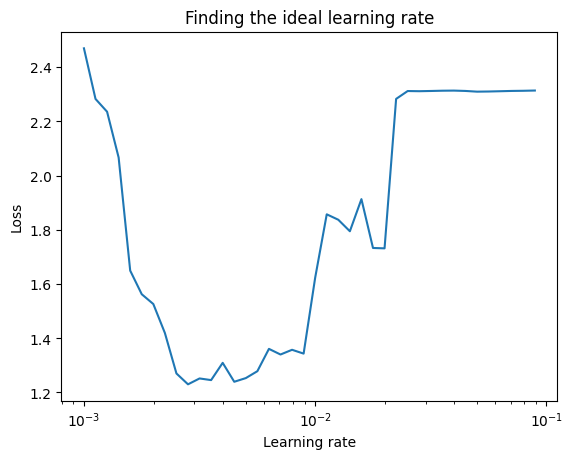

In [ ]:
#Let's plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [ ]:
#Let's refit the model with the ideal learning rate

#Set the random seed
tf.random.set_seed(42)

#1. Create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#2. Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(lr = 0.001),
                 metrics = ["accuracy"])

#3. Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs = 20,
                          validation_data = (test_data_norm, test_labels))



Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4381 - accuracy: 0.4349 - val_loss: 1.1253 - val_accuracy: 0.5608
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0075 - accuracy: 0.6099 - val_loss: 0.9437 - val_accuracy: 0.6490
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8716 - accuracy: 0.6908 - val_loss: 0.8445 - val_accuracy: 0.7179
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8008 - accuracy: 0.7185 - val_loss: 0.8005 - val_accuracy: 0.7281
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7680 - accuracy: 0.7276 - val_loss: 0.7807 - val_accuracy: 0.7256
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7467 - accuracy: 0.7349 - val_loss: 0.7847 - val_accuracy: 0.7275
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7329 - accuracy: 0.7394 - val_loss: 0.7559 - val_accuracy:

**Evaluating our multi-class classification model :**

To evaluate our multi-calss classification model we could:
* Evaluate it's performance using other classification metrics (Such as a confusion matrix)
* Asses some of it's predictions (Through visualization)
* Improve it's results (By training for more time or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2 now

# Create a confusion matrix

In [ ]:
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [ ]:
#Make some predictions with our model

y_probs = model_14.predict(test_data_norm) # probs is the short for "Prediction Probabilities"

#View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[6.4707912e-29, 1.5669421e-13, 3.3153414e-26, 3.5984560e-17,
        5.5915418e-17, 4.5716789e-01, 2.1185360e-21, 4.6025086e-02,
        1.7488404e-04, 4.9663216e-01],
       [8.6574109e-05, 3.4876255e-36, 8.6986506e-01, 2.5703273e-11,
        9.8771028e-02, 4.4421299e-21, 3.1277176e-02, 0.0000000e+00,
        6.2447171e-08, 0.0000000e+00],
       [4.2696027e-04, 9.7223818e-01, 1.4295397e-05, 2.6748691e-02,
        1.6215530e-05, 2.4502719e-04, 2.3195126e-04, 3.6155510e-05,
        1.2836719e-05, 2.9731551e-05],
       [4.2696027e-04, 9.7223818e-01, 1.4295397e-05, 2.6748691e-02,
        1.6215530e-05, 2.4502719e-04, 2.3195126e-04, 3.6155510e-05,
        1.2836719e-05, 2.9731551e-05],
       [1.3491364e-01, 8.3771884e-10, 2.4316244e-01, 1.2119738e-02,
        1.0700903e-01, 2.1454052e-07, 5.0214756e-01, 1.6045499e-16,
        6.4732088e-04, 1.1667488e-15]], dtype=float32)

**Note :** Remember to make predictions on the same kind of data your model was trained on (E.g if you train your model on normalized data then you will have to make predictions on normalized data only)



#Convert all of the prediction probabilities into integers



In [ ]:
#Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#View the first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)


array([[742,   4,  15, 149,   2,   0,  77,   0,  11,   0],
       [  6, 932,   0,  54,   1,   1,   5,   0,   1,   0],
       [ 29,   0, 546,  21, 182,   0, 215,   0,   7,   0],
       [ 46,  19,   0, 841,   6,   3,  68,   0,  17,   0],
       [  4,   0,  83,  49, 690,   0, 135,   0,  39,   0],
       [  0,   1,   0,   1,   0, 903,   0,  48,  12,  35],
       [174,   0,  78, 116, 272,   1, 342,   0,  17,   0],
       [  0,   0,   0,   0,   0,  42,   0, 924,   0,  34],
       [  1,   0,   0,  20,  27,  10,  16,   3, 922,   1],
       [  0,   0,   0,   0,   1,  30,   0,  39,   1, 929]])

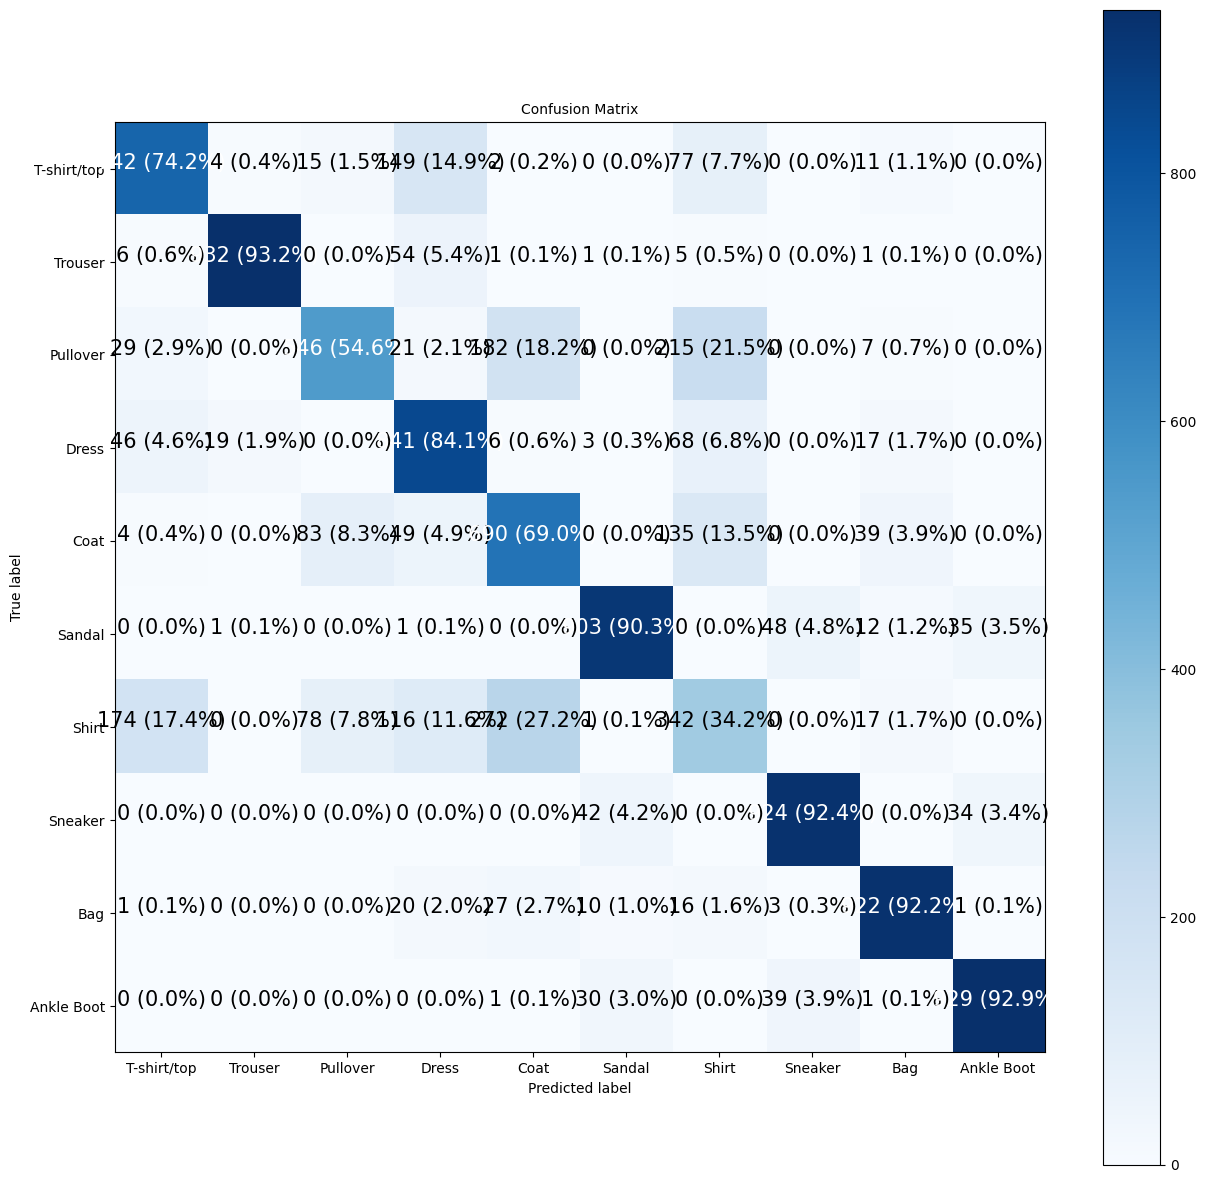

In [ ]:
#Make a pritier confusion matrics
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

**Note :**

Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models


How abou we create a fun little function for :
  * Plot a random image
  * Make a prediction on saide image
  * Label the plot with  the truth label and predict label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes) :
  """
  Picks a random image, plots it and labels it with a predction and truth label.
  """
  #set up random integer
  i= random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # we are predicting one image from 28, 28 image input size
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  #Change the color of the titles depending on if the prediction right or wrong

  if pred_label == true_label:
    color = "green"
  else :
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred : {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                                                    color=color) # Set the color to green or red based on if the prediction is right or wrong




1/1 [==============================] - 0s 23ms/step


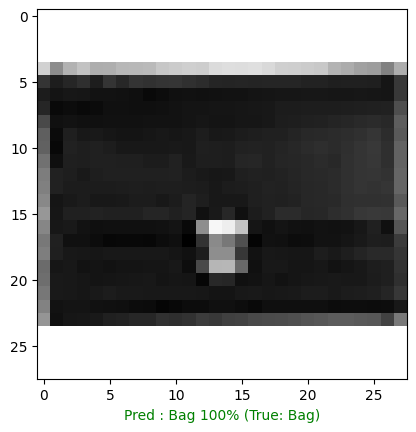

In [ ]:
# Check out our random image as well as it's prediction

plot_random_image(model = model_14,
                  images = test_data_norm, # Always make predictions on the same kind of the data the has been trained on
                  true_labels = test_labels,
                  classes = class_names)

# What patterns our model exactly learning



In [ ]:
# Find the layers of our mosr recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patters of the layer in our network
weights, biases = model_14.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[-0.19745778,  0.2753727 , -0.06782752, -0.16036917],
        [-0.61120653,  0.2699424 ,  1.2054553 ,  0.37981978],
        [-0.56783503,  0.5795134 ,  0.97849226,  0.28973356],
        ...,
        [-0.15729094,  0.73203254, -0.45114315,  0.5580493 ],
        [ 0.29101452, -0.3284014 ,  0.43671474,  0.00432127],
        [ 0.2717859 ,  0.42007983, -0.5688364 ,  0.40963566]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Now let's check the bias vector

* Every neuron has a bias vector. Each of these is paires with weights of the matrix.

* The bias vector get initialized as zeros (At least in the case of a TensorFlow Dense layer)

* The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer



In [ ]:
# Bias and biases shapes
biases, biases.shape # it gives of the first hidden layer


(array([ 2.499162  , -0.36927184,  0.72877496,  1.5726938 ], dtype=float32),
 (4,))

In [ ]:
 model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


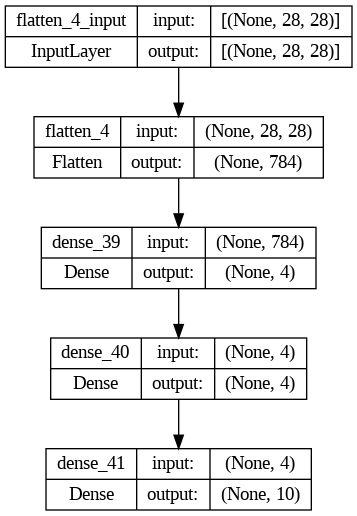

In [ ]:
#Let's check out the another way of viewing the deep learning models
from tensorflow.keras.utils import plot_model

#See the  inputs and outputs of each layer
plot_model(model_14, show_shapes = True)